<center><h2>M1 MMA - Optimisation sous contraintes</h2><h3>TP1 : descente de gradient projetée</h3></center>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

On considère le problème d'optimisation suivant
$$
    \inf_{x \in \mathbb{R}^n, \, Ax = y_0} \sum_{i = 1}^n N_\varepsilon(x_i)
$$
où
<ul>
    <li>$A\in\mathcal{M}_{m,n}(\mathbb{R})$, avec $m<n$, et que l'on suppose de rang plein,</li>
    <li>$y_0\in\mathbb{R}^m$,</li>
    <li>$N_\varepsilon : t\in\mathbb{R} \mapsto \sqrt{t^2+\varepsilon}$, avec $\varepsilon > 0$.
</ul>

On notera au besoin $S = \{x\in\mathbb{R}^n / Ax = y\}$.

<h2>I) Etude théorique</h2>

<b>Montrer que le problème d'optimisation est bien posé et admet une unique solution.</b>

<h2>II) Détermination de la projection sur $S$</h2>

<b>Justifier que $AA^T$ est inversible. Puis vérifier que $p : x\in\mathbb{R}^n \mapsto x - A^T(AA^T)^{-1}Ax$ est la projection orthogonale sur $\mbox{Ker}(A)$.</b>

<b>En déduire une expression de $P_S$, la projection sur $S$.</b>

<h2>III) Résolution numérique du problème par la méthode de la descente de gradient projeté</h2>

<b>Considérez dans un premier temps un exemple "joué". On prendra $n = 2$, $m = 1$ et vous choisirez une matrice $A$ ainsi qu'un vecteur $y_0$. Déterminer une solution $x_0$ de l'équation $Ax = y_0$.</b>

<b>Implémenter une fonction $\mbox{proj}$ représentant la projetion $P_S$.</b>

In [2]:
A = np.array([[1, 2]]) # on choisit un A arbitraire
y = np.array([2]) # ainsi qu'un y0
x0 = np.array([2, 0]) # x0 est un point quelconque satisfaisant Ax_0 = b

In [3]:
Ap = np.linalg.pinv(A) # Ap = A^T*(A*A^T)^{-1} : pseudo inverse de A de Moore-Penrose
B = np.dot(Ap, A)

def p(z):
    # renvoie p(z) : la projection orthogonale de z sur ker(A)
    return z - np.dot(B, z)
def proj(z):
    # renvoie P_S(z) : la projection de z sur S
    return x0 + p(z - x0)

<b>Implémenter la fonction objectif, ainsi que son gradient. On choisira dans un premier temps $\varepsilon = 0.1$.</b>

In [4]:
eps = 1e-1
def N_eps(t):
    return np.sqrt(t**2 + eps)
def dN_eps(t):
    return t/N_eps(t)

In [5]:
def f(x):
    return np.sum(N_eps(x))
def gradf(x):
    return x/N_eps(x)

<b>Ecrire une fonction représentant la méthode de la descente de gradient projeté. Elle prendra en argument un point de départ $\mbox{z0}\in\mathbb{R}^n$, le gradient de $f$, $\mbox{proj}$, une tolérance et éventuellement d'autres paramètres que vous jugeriez utiles.</b>

In [6]:
def descente_grad_proj(z0, f, gradf, proj, tau, tol, max_iter = 20000):
    z_list = [z0]
    x_list = [proj(z0)]
    f_list = [f(proj(z0))]
    dist_list = []
    # z = z0 - tau*gradf(z0)
    z = z0
    x = proj(z0)
    k = 0
    dist = 1
    dist_list.append(dist)
    while dist > tol and k < max_iter: # tant que ||x_{k+1} - x_k|| > tol, on continue
        z = x - tau*gradf(x)
        x = proj(z)
        dist = np.linalg.norm(x - x_list[-1]) # ||x_{k+1} - x_k||
        z_list.append(z)
        x_list.append(x)
        f_list.append(f(x))
        dist_list.append(dist)
        k += 1
    return x, x_list, z_list, f_list, dist_list

<b>Montrer que les hypothèses du résultat de convergence de l'algorithme sont satisfaites. On pourra montrer qu'il existe $m,L>0$ tels que pour tout $x\in\mathbb{R}^n$, $\nabla^2 f(x) \preceq L I_n$ et pour tout $x \in f^{-1}(]-\infty, f(P_S(z_0))])$, $mI_n\preceq \nabla^2 f(x)$. Avec $z_0$ un point quelconque de $\mathbb{R}^2$.

<b>Calculer la valeur du pas maximal autorisé d'après les valeurs $m,L$ trouvées et utiliser l'algorithme pour résoudre le problème.</b>

In [7]:
z0 = np.array([0, 0])
L = 1/np.sqrt(eps) # valeur de L trouvée dans la précédente question suite à des majorations
m = eps/f(proj(z0)) # valeur de m trouvée dans la précédente question suite à des minorations
tau_max = 2*m**2/L
print("Borne supérieure estimée pour le pas maximum : ", tau_max)

Borne supérieure estimée pour le pas maximum :  0.0033690201272953747


<b>Utiliser l'algorithme pour résoudre le problème.</b>

In [8]:
tau = 1e-3
x_star, x_list, z_list, f_list, dist_list = descente_grad_proj(z0, f, gradf, proj, tau, 1e-8)
print("Nombre itérations : ", len(x_list))
print("Solution approchée : ", x_star)

Nombre itérations :  6407
Solution approchée :  [0.16958073 0.91520964]


<b>Illustrer la convergence de l'algorithme.</b>

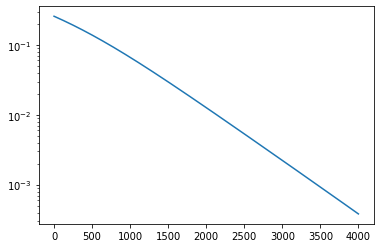

In [9]:
plt.semilogy([np.linalg.norm(x_list[k] - x_star) for k in range(4000)]) # on trace les erreurs ||x_k - x^*||
plt.show()

On remarque un comportement asymptotique linéaire sur ce graphe dont l'échelle des ordonnées est en $\log$. Donc la convergence est bien linéaire.

In [10]:
# On représente ci dessous la trajectoire produite par l'algorithme
# avec en fond les lignes de niveau de la fonction objectif.

In [11]:
def S(t):
    # permet de représenter l'ensemble des points de S (en noir sur la figure ci-dessous)
    return np.array([t, 1 - .5*t])

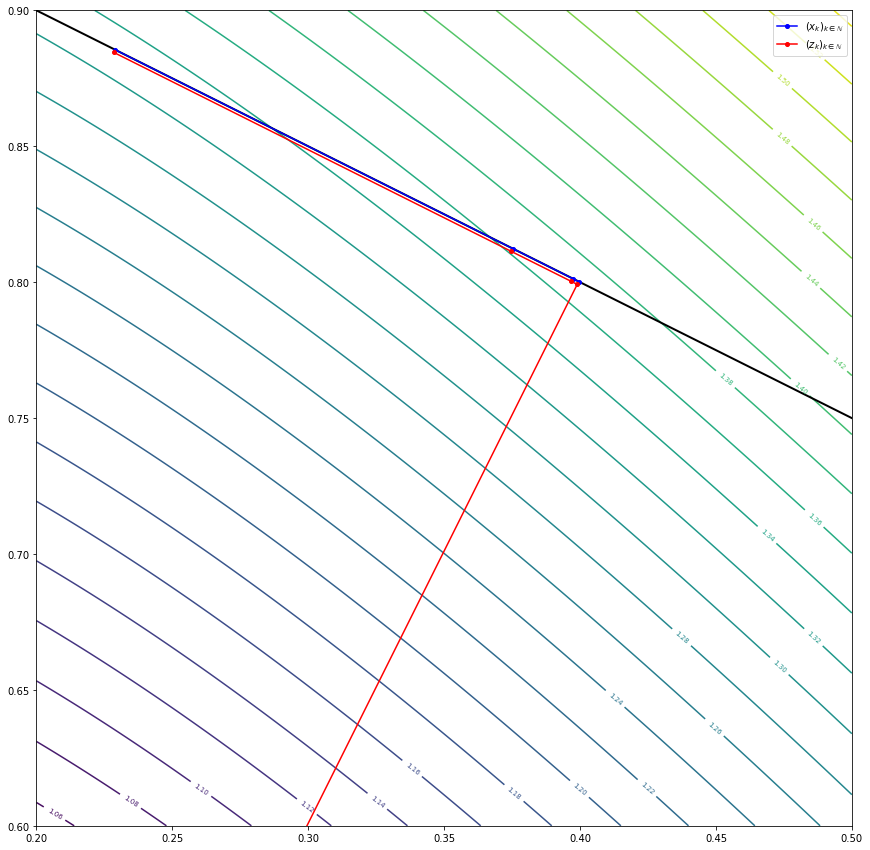

In [12]:
dom = [0.2, 0.5, 0.6, 0.9]
X, Y = np.linspace(dom[0], dom[1], 200), np.linspace(dom[2], dom[3], 200)
X, Y = np.meshgrid(X, Y)
Z = np.zeros(X.shape)
for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        Z[i, j] = f(np.array([X[i, j], Y[i, j]]))

# Graphique des lignes de niveau
fig, ax = plt.subplots(figsize = (15, 15))
CS = ax.contour(X, Y, Z, 30)
ax.clabel(CS, fontsize = 7)
ax.set_aspect('equal', adjustable = 'box') # pour que les axes aient la même échelle
ax.set_xlim([dom[0], dom[1]])
ax.set_ylim([dom[2], dom[3]])

tt = np.linspace(0, 2, 100)
plt.plot(tt, [S(t)[1] for t in tt], linestyle = "-", color = "black", lw = 2.0)

Ii = np.array([1, 10, 100, 1000]) # on va représenter les x_k et z_k pour k dans cet ensemble
plt.plot([x_list[i][0] for i in Ii], [x_list[i][1] for i in Ii], color = "blue", marker = "o", ms = 4.0, label = "$(x_k)_{k\in\mathbb{N}}$")
plt.plot([z_list[i][0] for i in np.concatenate((np.array([0]), Ii + 1))], [z_list[i][1] for i in np.concatenate((np.array([0]), Ii + 1))], color = "red", marker = "o", ms = 4.0, label = "$(z_k)_{k\in\mathbb{N}}$")

plt.legend()
plt.show()